## Data Cleaning

The main focus of this notebook is to create a fairly workable data set that we will use for the rest of the project to conduct visualizations, and base our models off/hypotheses. For the EDA checkpoint, the dataset will be incomplete as there is a lot of imputation/manipulation we will need to do to have all counties accounted for. 

Two Plots (at the moment):

- **Diabetes Rates (%) vs. Unemployment Rate** and correlation coefficient of **0.19**
- **Diabetes Rates (%) vs. Personal Income Per Capita** and correlation coefficient of **0.29**                                                                                                                                             

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
diabetes_rates_test = pd.read_csv('us_county_diabetes_rates.csv')
diabetes_rates_test['CountyFIPS'] = diabetes_rates_test['CountyFIPS'].astype(str)
# percentage, lower limit, upper limit of adults aged 20+ diagnosed with diabetes 
# data as of 2021 -- all counties except all of Florida and 8 other counties have 'No Data'
# going to impute previous year (2020) for 2021 data for all missing counties -- have already done it for Florida but not the 8 counties

In [54]:
diabetes_rates_test = diabetes_rates_test.replace('No Data', np.nan)
diabetes_rates_test['no percentage'] = diabetes_rates_test['Percentage'].isna()
# Since the csv encodes null values as No Data, replacing with nan so they are easier to find using isnan()
diabetes_rates_test
diabetes_rates_test[(diabetes_rates_test['no percentage'] == True) & (diabetes_rates_test['State'] != 'Florida')] # all counties of florida are null

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no percentage
0,Clifton Forge City,Virginia,51560,NaN,NaN,NaN,True
1,Bedford City,Virginia,51515,NaN,NaN,NaN,True
2,Shannon County,South Dakota,46113,NaN,NaN,NaN,True
70,Wrangell-Petersburg Census Area,Alaska,2280,NaN,NaN,NaN,True
71,Wade Hampton Census Area,Alaska,2270,NaN,NaN,NaN,True
72,Valdez-Cordova Census Area,Alaska,2261,NaN,NaN,NaN,True
73,Skagway-Hoonah-Angoon,Alaska,2232,NaN,NaN,NaN,True
74,Prince of Wales - Outer Ketchikan,Alaska,2201,NaN,NaN,NaN,True


In [55]:
florida_diabetes_2020 = pd.read_csv('flo_2020_diabetes.csv')
florida_diabetes_2020['CountyFIPS'] = florida_diabetes_2020['CountyFIPS'].astype(str)

# flo['Percentage'] = flo['Percentage'].astype(float)
# flo['Lower Limit'] = flo['Lower Limit'].astype(float)
# flo['Upper Limit'] = flo['Upper Limit'].astype(float)

In [56]:
no_nans = diabetes_rates_test.dropna(subset='Percentage').reset_index(drop = True)

# dropped any counties that don't have percentage, UL, LL

In [57]:
with_florida = pd.concat([no_nans, florida_diabetes_2020]).reset_index(drop = True)
with_florida 

# with_florida csv is all counties that have percentage, LL, and UL values (NOT including the 8 counties that don't have data -- will account for this later)

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no percentage
0,Teton County,Wyoming,56039,4.4,3.1,6,False
1,Gallatin County,Montana,30031,4.7,3.5,6,False
2,San Juan County,Washington,53055,4.7,3.2,6.1,False
3,Summit County,Colorado,8117,5.1,3.5,7.2,False
4,Blaine County,Idaho,16013,5.1,3.6,7,False
...,...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5,NaN
3139,Lake County,Florida,12069,11.0,9.0,13.4,NaN
3140,Lee County,Florida,12071,7.6,6.1,9.2,NaN
3141,Leon County,Florida,12073,8.3,6.3,10.5,NaN


In [58]:
with_florida['Percentage'] = with_florida['Percentage'].astype(float)
with_florida['Lower Limit'] = with_florida['Lower Limit'].astype(float)
with_florida['Upper Limit'] = with_florida[' Upper Limit'].astype(float)

# Percentage is originally type 'str', converted to float so that they can be plotted

In [59]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

# ^^ pasted from norcal82's github -- thanks! 


# Plots each state's county diabetes rates: 

# for s in state_names:
#     plt.figure()
#     plt.title(s)
#     d_state = with_florida[combined_df['State'] == s]
#     plt.hist(d_state['Percentage'])
#     plt.show()
    

# THIS IS for each state, the distribution is 

In [60]:
unemployment_df = pd.read_csv('laucnty21.csv', converters={'County FIPS Code': str})

# FIPS Code converted to string.. originally as an integer-- this is to be able to index on string

In [61]:
unemployment_df['State FIPS Code'] = unemployment_df['State FIPS Code'].astype(str)
# Do this conversion after so that leading 0's are retained!  (unlike above)

unemployment_df[unemployment_df['County Name/State Abbreviation'] == 'Marin County, CA']

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
207,CN0604100000000,6,041,"Marin County, CA",2021,"121,936","116,026","5,910",4.8


In [62]:
unemployment_df['combined FIPS'] = unemployment_df['State FIPS Code'] + unemployment_df['County FIPS Code']
unemployment_df[unemployment_df['County Name/State Abbreviation'] == 'Sussex County, DE']
# Formatted as FIPS is in diabetes so that they can be merged

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),combined FIPS
320,CN1000500000000,10,005,"Sussex County, DE",2021,"110,710","105,215","5,495",5.0,10005


In [63]:
diabetes_unemployment = with_florida.merge(unemployment_df, left_on = 'CountyFIPS', right_on = 'combined FIPS', how = 'left')
#diabetes_unemployment.drop(columns = ['County Name/State Abbreviation', 'Year'])
diabetes_unemployment = diabetes_unemployment.iloc[0:3143]
# last few rows are NaN, can remove they are planning regions in Connecticut, not relevant to our analysis 

In [64]:
diabetes_unemployment

# contains information on county level and unemployment -- 9 more missing 

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no percentage,Upper Limit,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),combined FIPS
0,Teton County,Wyoming,56039,4.4,3.1,6,False,6.0,CN5603900000000,56,039,"Teton County, WY",2021.0,"15,318","14,793",525,3.4,56039
1,Gallatin County,Montana,30031,4.7,3.5,6,False,6.0,CN3003100000000,30,031,"Gallatin County, MT",2021.0,"71,103","69,291","1,812",2.5,30031
2,San Juan County,Washington,53055,4.7,3.2,6.1,False,6.1,CN5305500000000,53,055,"San Juan County, WA",2021.0,"8,192","7,789",403,4.9,53055
3,Summit County,Colorado,8117,5.1,3.5,7.2,False,7.2,CN0811700000000,8,117,"Summit County, CO",2021.0,"19,608","18,676",932,4.8,8117
4,Blaine County,Idaho,16013,5.1,3.6,7,False,7.0,CN1601300000000,16,013,"Blaine County, ID",2021.0,"13,038","12,561",477,3.7,16013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5,NaN,12.5,CN1206700000000,12,067,"Lafayette County, FL",2021.0,"2,540","2,419",121,4.8,12067
3139,Lake County,Florida,12069,11.0,9.0,13.4,NaN,13.4,CN1206900000000,12,069,"Lake County, FL",2021.0,"170,389","162,570","7,819",4.6,12069
3140,Lee County,Florida,12071,7.6,6.1,9.2,NaN,9.2,CN1207100000000,12,071,"Lee County, FL",2021.0,"347,884","332,530","15,354",4.4,12071
3141,Leon County,Florida,12073,8.3,6.3,10.5,NaN,10.5,CN1207300000000,12,073,"Leon County, FL",2021.0,"155,084","148,394","6,690",4.3,12073


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

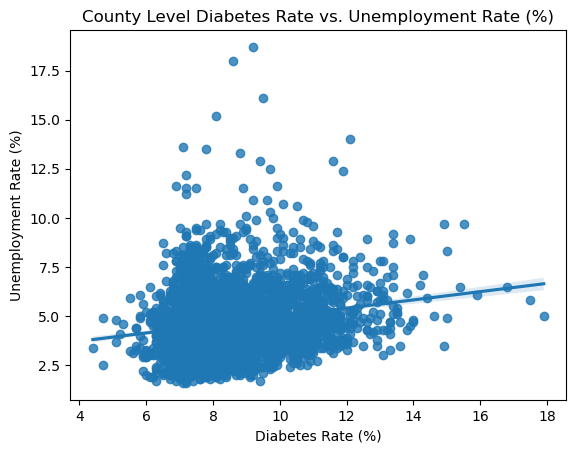

In [66]:
#final_df.plot.scatter(x='Percentage', y='Unemployment Rate (%)')
fig = sns.regplot(data = diabetes_unemployment, x='Percentage', y='Unemployment Rate (%)')
plt.title('County Level Diabetes Rate vs. Unemployment Rate (%)')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [67]:
diabetes_unemployment[['Percentage', 'Unemployment Rate (%)']].corr()

# There is a weak positive correlation between Diabetes Rates and Unemployment Rates

,Percentage,Unemployment Rate (%)
Percentage,1.000000,0.195237
Unemployment Rate (%),0.195237,1.000000


In [68]:
county_info_small = pd.read_csv('county_info_small.csv')
personal_income = county_info_small[county_info_small['Description'] == ' Per capita net earnings 4/'].reset_index(drop = True)

# personal_income is data frame containing per capita personal income for each county (rather than other Descriptions)

In [69]:
personal_income

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2018,2019,2021,2022,2023
0,"""01000""",Alabama,5,CAINC30,120,...,Per capita net earnings 4/,Dollars,24452,25301,27842,29718,31195
1,"""01001""","Autauga, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,25796,26798,29300,31156,33640
2,"""01003""","Baldwin, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,26341,26957,30176,31729,33953
3,"""01005""","Barbour, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,17101,17240,18693,19720,19320
4,"""01007""","Bibb, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,17610,18727,20219,21976,23003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,"""56037""","Sweetwater, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,40495,41454,37832,41237,43955
3187,"""56039""","Teton, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,58533,62445,93615,95686,104988
3188,"""56041""","Uinta, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,25199,25989,25814,27071,28801
3189,"""56043""","Washakie, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,25046,25262,29232,28824,29445


In [70]:
# p[1:len(p)] for p in personal_income['GeoFIPS'] 

personal_income['GeoFIPS'] = personal_income['GeoFIPS'].str.strip(' " " ')
personal_income['GeoFIPS'] = [p[1:len(p)] if p[0] == '0' else p for p in personal_income['GeoFIPS']]

# reformatting FIPS code so that it can be joined with diabetes_unemployment table

In [71]:
counties_df = diabetes_unemployment.merge(personal_income, left_on = 'CountyFIPS', right_on = 'GeoFIPS', how = 'left')
counties_df

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no percentage,Upper Limit,LAUS Code,State FIPS Code,...,TableName,LineCode,IndustryClassification,Description,Unit,2018,2019,2021,2022,2023
0,Teton County,Wyoming,56039,4.4,3.1,6,False,6.0,CN5603900000000,56,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,58533,62445,93615,95686,104988
1,Gallatin County,Montana,30031,4.7,3.5,6,False,6.0,CN3003100000000,30,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,32524,34324,43275,48024,51557
2,San Juan County,Washington,53055,4.7,3.2,6.1,False,6.1,CN5305500000000,53,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,23410,24497,28238,31082,33341
3,Summit County,Colorado,8117,5.1,3.5,7.2,False,7.2,CN0811700000000,8,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,40527,43257,46953,52326,55319
4,Blaine County,Idaho,16013,5.1,3.6,7,False,7.0,CN1601300000000,16,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,38548,40463,49367,49485,51937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5,NaN,12.5,CN1206700000000,12,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,14324,14335,16195,19053,19867
3139,Lake County,Florida,12069,11.0,9.0,13.4,NaN,13.4,CN1206900000000,12,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,21744,22560,25167,27525,29580
3140,Lee County,Florida,12071,7.6,6.1,9.2,NaN,9.2,CN1207100000000,12,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,22292,22292,24245,25705,27483
3141,Leon County,Florida,12073,8.3,6.3,10.5,NaN,10.5,CN1207300000000,12,...,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,28086,29142,32341,33589,35957


In [72]:
diabetes_income = counties_df[['Percentage', '2021']]
diabetes_income['2021'] = diabetes_income['2021'].astype(int)

fig = sns.regplot(data = diabetes_income, x='Percentage', y='2021')
# 2021 (personal income for that year) is encoded as string, convert to int so that it is quantitative ^^

# plt.scatter(data = diabetes_income, x = 'Percentage', y = '2021')
plt.title('County Level Diabetes Rate vs. Personal Income Per Capita')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Personal Income Per Capita')
plt.show()

ValueError: cannot convert float NaN to integer

In [ ]:
diabetes_income[['Percentage', '2021']].corr()

In [ ]:
personal_income

In [ ]:
counties_df

In [ ]:
health = pd.read_csv('county_health_data.csv', usecols = ['5-digit FIPS Code', 'Name', 'Life expectancy raw value', 'Adult obesity raw value', 'Adult smoking raw value', 'Physical inactivity raw value', 'Excessive drinking raw value', 'Median household income raw value', 'Uninsured raw value', '% 65 and older raw value', 'Poor physical health days raw value', 'Poor or fair health raw value', 'Population raw value', 'Access to exercise opportunities raw value', 'Diabetes prevalence raw value'
])

In [ ]:
health['5-digit FIPS Code'] = health['5-digit FIPS Code'].astype(str)
health['5-digit FIPS Code'] = [p[1:len(p)] if p[0] == '0' else p for p in health['5-digit FIPS Code']]

In [ ]:
woah = pd.merge(counties_df, health, left_on = 'CountyFIPS', right_on = '5-digit FIPS Code', how = 'left')
woah

In [ ]:
fig = sns.regplot(data = woah, x='Percentage', y='Adult obesity raw value')
# 2021 (personal income for that year) is encoded as string, convert to int so that it is quantitative ^^

# plt.scatter(data = diabetes_income, x = 'Percentage', y = '2021')
plt.title('County Level Diabetes Rate vs. Personal Income Per Capita')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Personal Income Per Capita')
plt.show()



In [ ]:
woah[['Percentage', 'Excessive drinking raw value']].corr()

In [ ]:
woah[['Percentage', 'Uninsured raw value']].corr()

In [ ]:
woah[['Percentage', '% 65 and older raw value']].corr()

In [ ]:
woah[['Percentage', 'Poor or fair health raw value']].corr()

In [ ]:
woah[['Percentage', 'Life expectancy raw value']].corr()

In [ ]:
woah[['Percentage', 'Access to exercise opportunities raw value']].corr()

In [ ]:
# income , popoulation, diabetes rate, obesity index, and access exercise opportunity 

In [ ]:
cols = ['Percentage',  'Excessive drinking raw value']
# 'Median household income raw value', 'Adult obesity raw value', 'Physical inactivity raw value', 'Population raw value', 'Access to exercise opportunities raw value',

In [ ]:
null_counts = []
for c in cols:
    woah[f'has null {c}'] = woah[c].isna()
    null_counts.append(sum(woah[c].isna()))
    

In [ ]:
null_counts

In [ ]:
# miss, wv, alabana, mass, co, vermonty
no_nulls = woah[ (woah['has null Excessive drinking raw value'] == False)]

In [ ]:
fig = sns.regplot(data = no_nulls, x='Percentage', y='Excessive drinking raw value')
# 2021 (personal income for that year) is encoded as string, convert to int so that it is quantitative ^^

# plt.scatter(data = diabetes_income, x = 'Percentage', y = '2021')
plt.title('County Level Diabetes Rate vs. Excessive drinking raw value')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Excessive drinking raw value')
plt.show()

In [ ]:
no_nulls

In [ ]:
no_nulls['floatie'] = no_nulls['Excessive drinking raw value'].astype(float)

sns.histplot(data=no_nulls, x="floatie", bins= 50)
np.mean(no_nulls['Excessive drinking raw value'].astype(float)), np.std(no_nulls['Excessive drinking raw value'].astype(float)), np.median((no_nulls['Excessive drinking raw value'].astype(float)))
bound_value = np.median((no_nulls['Excessive drinking raw value'].astype(float)))

In [ ]:
no_nulls['low drinking raw value'] = (no_nulls['floatie'] < bound_value).astype(int)
#no_nulls['high drinking raw value'] = (no_nulls['floatie'] >= bound_value).astype(int) ...bruh don't need this
hehe = no_nulls[['Percentage', 'Excessive drinking raw value', 'low drinking raw value', 'high drinking raw value']]


In [ ]:
mississippi = no_nulls[no_nulls['State'] == 'Mississippi']
mississippi

In [ ]:
# A/B testing code used

def mean_difference(binary_col, numerical_col):
    new_df = pd.DataFrame({'binary_col':no_nulls[binary_col], 'numerical_col':no_nulls[numerical_col]})
    groupie = new_df.groupby(by=['binary_col']).mean()
    act_diff = abs(groupie['numerical_col'][0] - groupie['numerical_col'][1])
    return act_diff

def simulate_one_difference(binary_col, numerical_col):
    tester = table_name.copy()
    tester[binary_col] = tester[binary_col].sample(n=len(tester[binary_col]) , replace=False, axis=0).values
    shuffled_df = pd.DataFrame({'shuffled': tester[binary_col], 'numerical': tester[numerical_col]})
    test = shuffled_df.groupby(by=['shuffled']).mean()
    diff = abs(test['numerical'][0] - test['numerical'][1])
    return diff


def avg_difference_in_means(binary_col, numerical_col, table_name):
    actual_diff = mean_difference(binary_col, numerical_col, table_name)
    repetitions = np.arange(25000)
    diff_arr = [] 
    for i in repetitions:
        diff = simulate_one_difference(binary_col, numerical_col)
        diff_arr = np.append(diff_arr, diff)
    p_val = np.count_nonzero(diff_arr >= actual_diff) / 25000 
    return p_val

In [ ]:
#mean_difference('low drinking raw value', 'Percentage', mississippi)
mississippi['low drinking raw value']

In [ ]:
avg_difference_in_means('low drinking raw value', 'Percentage', no_nulls)

In [ ]:
 mean_difference('low drinking raw value', 'Percentage')

In [ ]:
new_df = pd.DataFrame({'binary_col':mississippi['low drinking raw value'], 'numerical_col':mississippi['Percentage']})
new_df
groupie = new_df.groupby(by=['binary_col']).mean()
new_df[new_df['
act_diff = abs(groupie['numerical_col'][0] - groupie['numerical_col'][1])

In [ ]:
from scipy.stats import pearsonr

pearsonr(mississippi['Excessive drinking raw value'].astype(float), mississippi['Percentage'])

In [ ]:
# miss, wv, alabana, mass, co, vermonty
states_list = ['Mississippi', 'West Virginia', 'Alabama', 'Massachusetts', 'Colorado', 'Vermont']

for s in states_list:
    state_df = no_nulls[no_nulls['State'] == s]
    #sns.histplot(data=state_df, x="floatie", bins= 7)
    sns.histplot(data=state_df, x='Percentage')
    plt.show()

In [74]:
#floatie is float of Excessive drinking raw value

In [80]:
census_regions = pd.read_csv('census_regions.csv')

with_regions = no_nulls.merge(census_regions, left_on = 'State', right_on = 'State', how = 'left')

In [81]:
with_regions 

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no percentage,Upper Limit,LAUS Code,State FIPS Code,...,Median household income raw value,Population raw value,% 65 and older raw value,has null Percentage,has null Excessive drinking raw value,floatie,low drinking raw value,State Code,Region_y,Division
0,Teton County,Wyoming,56039,4.4,3.1,6,False,6.0,CN5603900000000,56,...,98837,23464,0.158413,False,False,0.237739,0,WY,West,Mountain
1,Gallatin County,Montana,30031,4.7,3.5,6,False,6.0,CN3003100000000,30,...,73731,114434,0.131342,False,False,0.257801,0,MT,West,Mountain
2,San Juan County,Washington,53055,4.7,3.2,6.1,False,6.1,CN5305500000000,53,...,69113,17582,0.35161,False,False,0.217295,0,WA,West,Pacific
3,Summit County,Colorado,8117,5.1,3.5,7.2,False,7.2,CN0811700000000,8,...,86570,31011,0.142949276,False,False,0.240038,0,CO,West,Mountain
4,Blaine County,Idaho,16013,5.1,3.6,7,False,7.0,CN1601300000000,16,...,75778,23021,0.203422962,False,False,0.205133,0,ID,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Lafayette County,Florida,12067,9.3,6.5,12.5,NaN,12.5,CN1206700000000,12,...,45480,8422,0.172761814,False,False,0.179624,1,FL,South,South Atlantic
3137,Lake County,Florida,12069,11.0,9.0,13.4,NaN,13.4,CN1206900000000,12,...,57660,367118,0.270719496,False,False,0.193656,0,FL,South,South Atlantic
3138,Lee County,Florida,12071,7.6,6.1,9.2,NaN,9.2,CN1207100000000,12,...,62364,770577,0.291511426,False,False,0.231797,0,FL,South,South Atlantic
3139,Leon County,Florida,12073,8.3,6.3,10.5,NaN,10.5,CN1207300000000,12,...,55081,293582,0.138925411,False,False,0.199483,0,FL,South,South Atlantic


In [88]:
region_arr = with_regions['Region_y']
division_arr = with_regions['Division']

In [93]:

with_regions['Updated Region'] = [division_arr[i] if region_arr[i] == 'South' else region_arr[i] for i in range(len(region_arr))]

In [94]:
with_regions

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,no percentage,Upper Limit,LAUS Code,State FIPS Code,...,Population raw value,% 65 and older raw value,has null Percentage,has null Excessive drinking raw value,floatie,low drinking raw value,State Code,Region_y,Division,Updated Region
0,Teton County,Wyoming,56039,4.4,3.1,6,False,6.0,CN5603900000000,56,...,23464,0.158413,False,False,0.237739,0,WY,West,Mountain,West
1,Gallatin County,Montana,30031,4.7,3.5,6,False,6.0,CN3003100000000,30,...,114434,0.131342,False,False,0.257801,0,MT,West,Mountain,West
2,San Juan County,Washington,53055,4.7,3.2,6.1,False,6.1,CN5305500000000,53,...,17582,0.35161,False,False,0.217295,0,WA,West,Pacific,West
3,Summit County,Colorado,8117,5.1,3.5,7.2,False,7.2,CN0811700000000,8,...,31011,0.142949276,False,False,0.240038,0,CO,West,Mountain,West
4,Blaine County,Idaho,16013,5.1,3.6,7,False,7.0,CN1601300000000,16,...,23021,0.203422962,False,False,0.205133,0,ID,West,Mountain,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Lafayette County,Florida,12067,9.3,6.5,12.5,NaN,12.5,CN1206700000000,12,...,8422,0.172761814,False,False,0.179624,1,FL,South,South Atlantic,South Atlantic
3137,Lake County,Florida,12069,11.0,9.0,13.4,NaN,13.4,CN1206900000000,12,...,367118,0.270719496,False,False,0.193656,0,FL,South,South Atlantic,South Atlantic
3138,Lee County,Florida,12071,7.6,6.1,9.2,NaN,9.2,CN1207100000000,12,...,770577,0.291511426,False,False,0.231797,0,FL,South,South Atlantic,South Atlantic
3139,Leon County,Florida,12073,8.3,6.3,10.5,NaN,10.5,CN1207300000000,12,...,293582,0.138925411,False,False,0.199483,0,FL,South,South Atlantic,South Atlantic


In [100]:
# distribution of diabetes, dist. of excessive drinking, scatter plot 

# pearson coeffs. 


with_regions['Updated Region'].value_counts()

regions = ['Midwest', 'South Atlantic', 'West South Central', 'West', 'East South Central', 
            'Northeast']


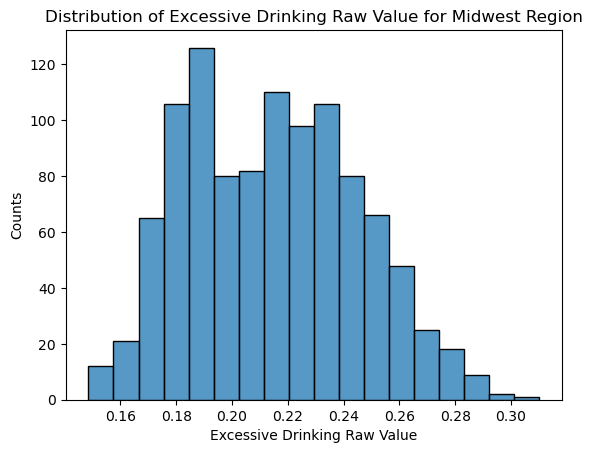

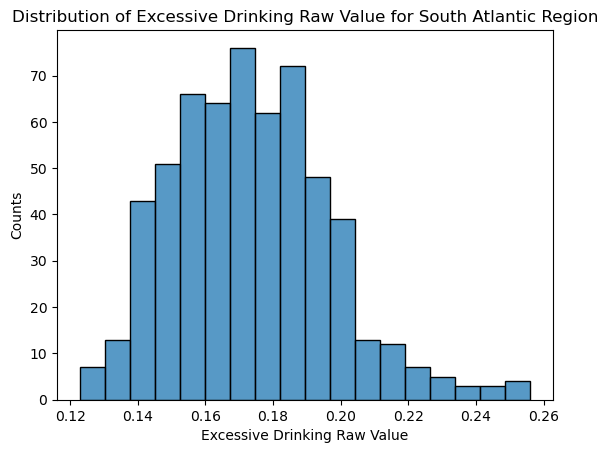

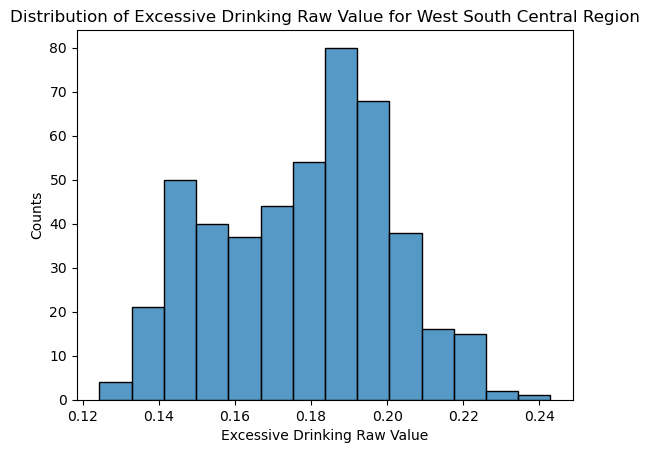

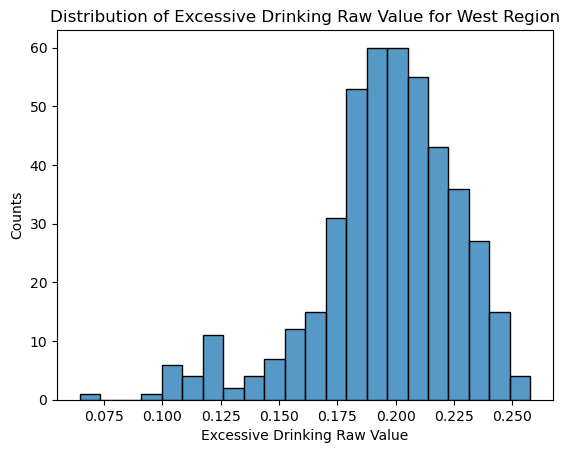

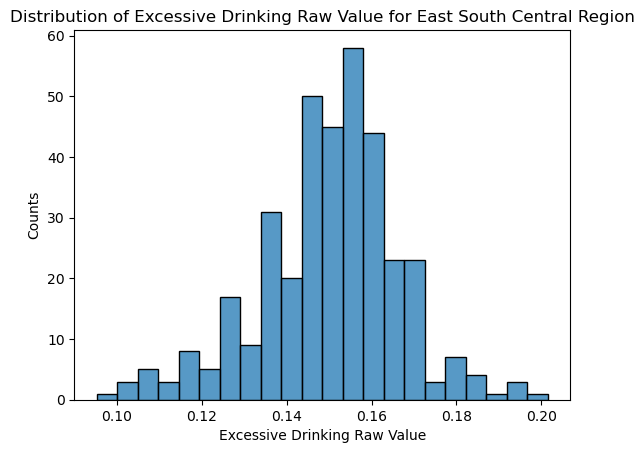

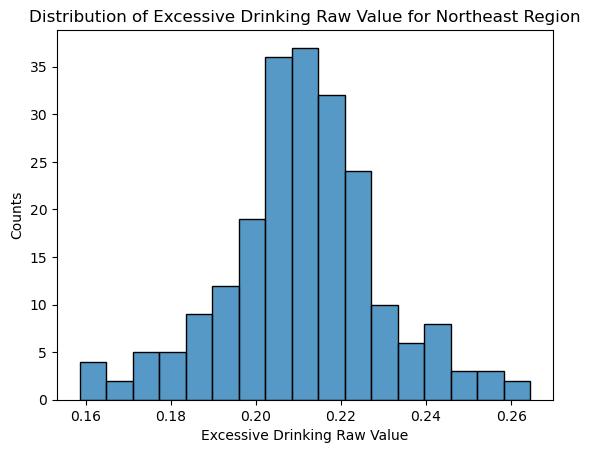

In [163]:
for r in regions: 
    data = with_regions[with_regions['Updated Region'] == r]
    sns.histplot(data, x = 'floatie')
    plt.xlabel('Excessive Drinking Raw Value')
    plt.ylabel('Counts')
    plt.title(f'Distribution of Excessive Drinking Raw Value for {r} Region')
    plt.show()

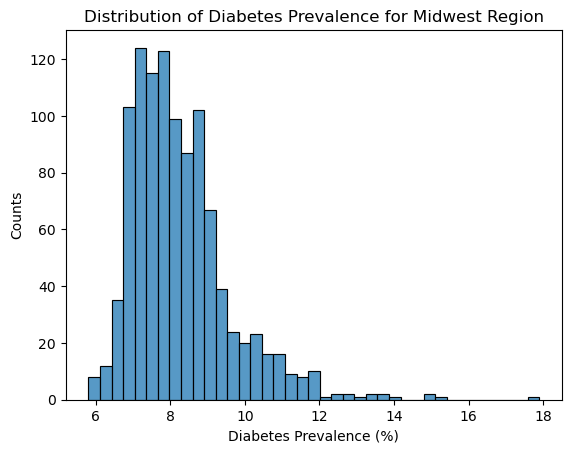

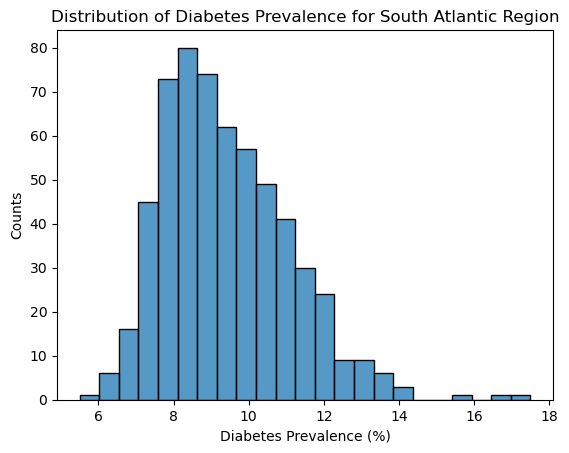

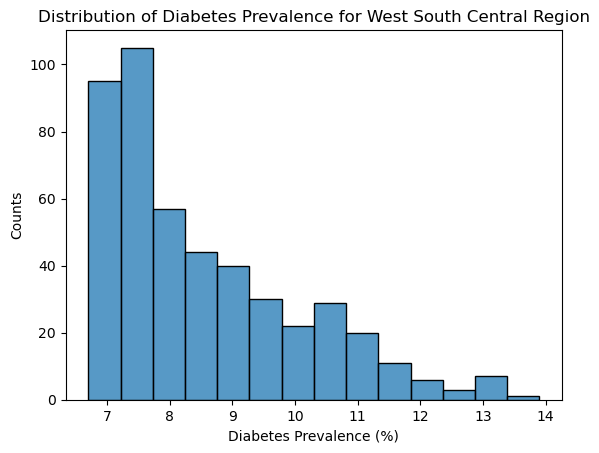

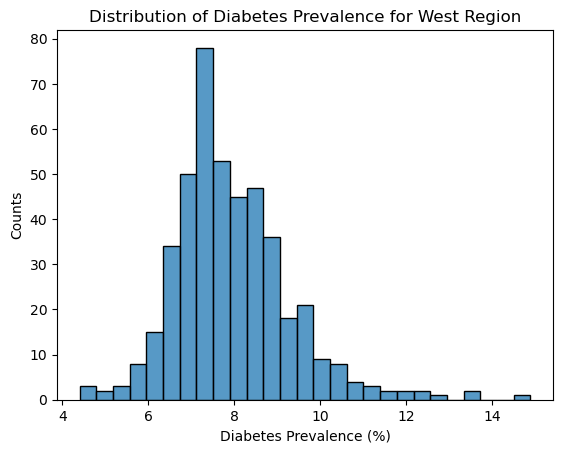

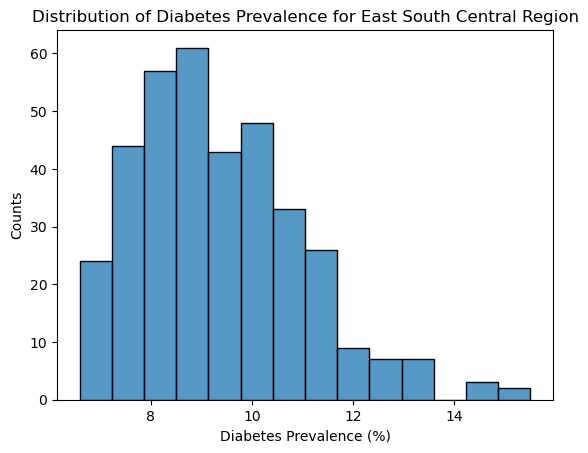

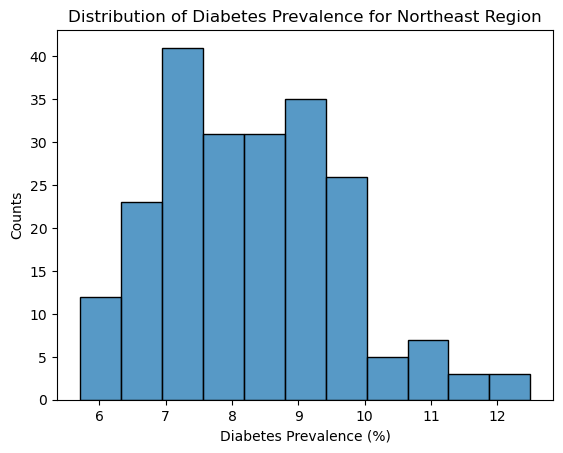

In [164]:
for r in regions: 
    data = with_regions[with_regions['Updated Region'] == r]
    sns.histplot(data, x = 'Percentage')
    plt.xlabel('Diabetes Prevalence (%)')
    plt.ylabel('Counts')
    plt.title(f'Distribution of Diabetes Prevalence for {r} Region')
    plt.show()

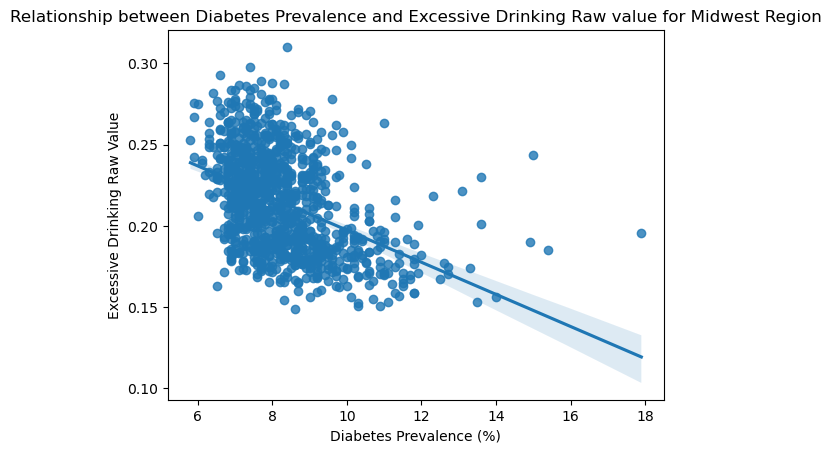

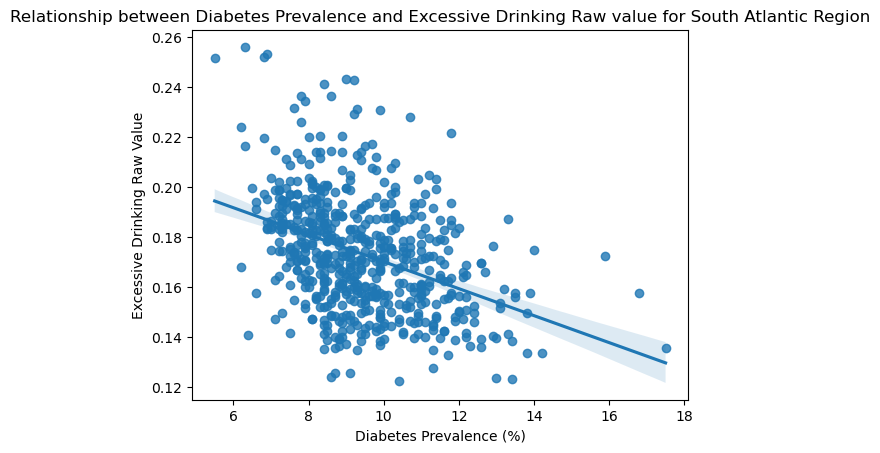

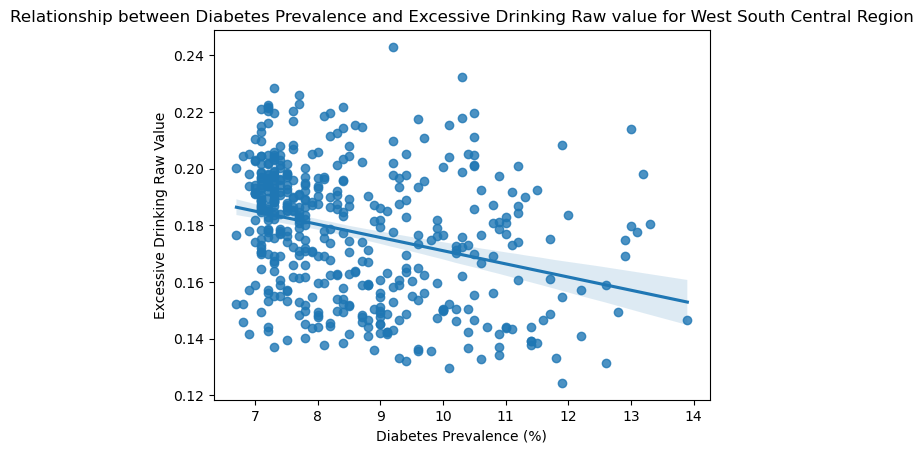

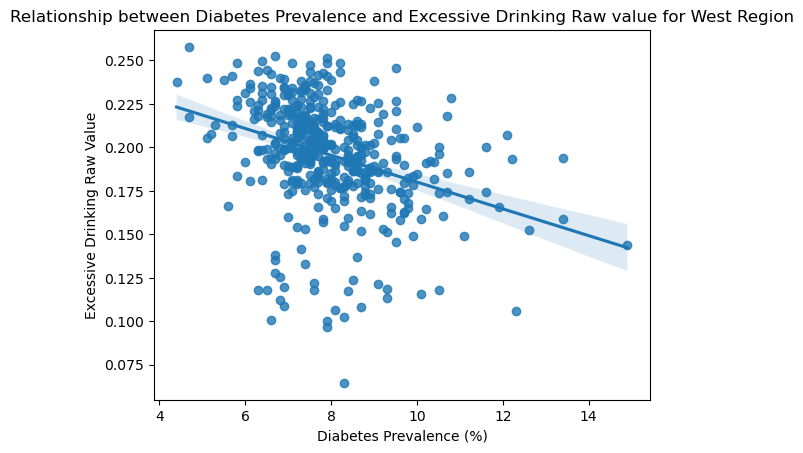

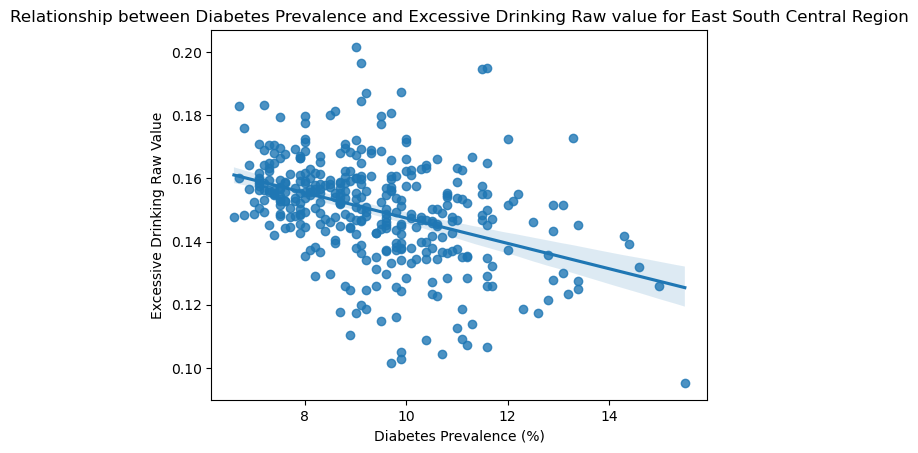

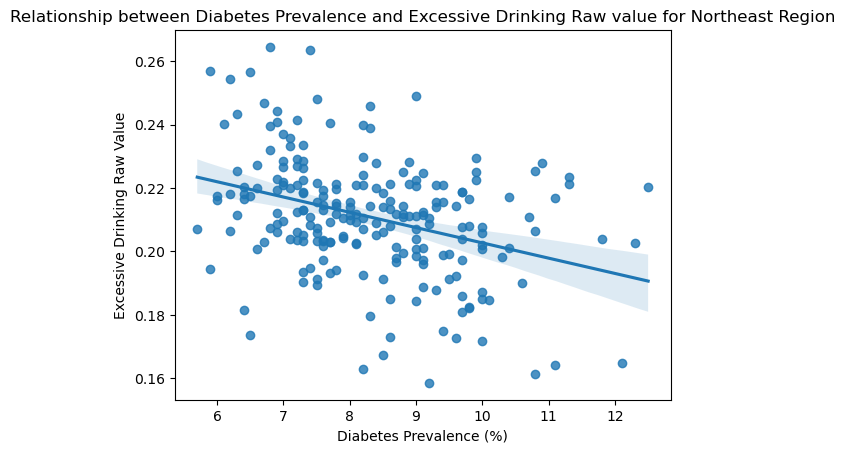

In [165]:
for r in regions: 
    data = with_regions[with_regions['Updated Region'] == r]
    sns.regplot(data, x = 'Percentage', y = 'floatie')
    plt.xlabel('Diabetes Prevalence (%)')
    plt.ylabel('Excessive Drinking Raw Value')
    plt.title(f'Relationship between Diabetes Prevalence and Excessive Drinking Raw value for {r} Region')
    plt.show()

In [166]:
print('ur soooooooooooooooooooooo hot. <3')

ur soooooooooooooooooooooo hot. <3


In [131]:
# print('no u')
# print('no ur the ')
# for i in range(1000):
#     print('prettiest of the ')
# print('of them all')

In [156]:
regions = ['Midwest', 'South Atlantic', 'West South Central', 'West', 'East South Central', 
            'Northeast']
corr_coeffs = []
p_vals = [] 
for r in regions:
    data = with_regions[with_regions['Updated Region'] == r]
    corr_coeffs.append(pearsonr(data['Percentage'], data['floatie'])[0])
    p_vals.append(pearsonr(data['Percentage'], data['floatie'])[1])
blah = with_regions[with_regions['Updated Region'] == 'Northeast']
pearsonr(blah['Percentage'], blah['floatie'])[0]

corr_coeffs
#pearsonr(data['Percentage'], data['floatie'])

[np.float64(-0.4360926847710927),
 np.float64(-0.38857537789732544),
 np.float64(-0.30583804468829795),
 np.float64(-0.3371436293143545),
 np.float64(-0.39555484182005096),
 np.float64(-0.3527131705848453)]

In [157]:
p_vals

[np.float64(3.286607370433994e-50),
 np.float64(1.2462370568306154e-22),
 np.float64(1.2373336446995478e-11),
 np.float64(2.4147440335358033e-13),
 np.float64(4.4020769156705914e-15),
 np.float64(9.380146811772076e-08)]

In [161]:
# Bonferroni
below_threshold = []
for p in p_vals:
    below_threshold.append(p <= 0.05 / len(p_vals))

below_threshold

[np.True_, np.True_, np.True_, np.True_, np.True_, np.True_]